In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib notebook

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

<IPython.core.display.Javascript object>


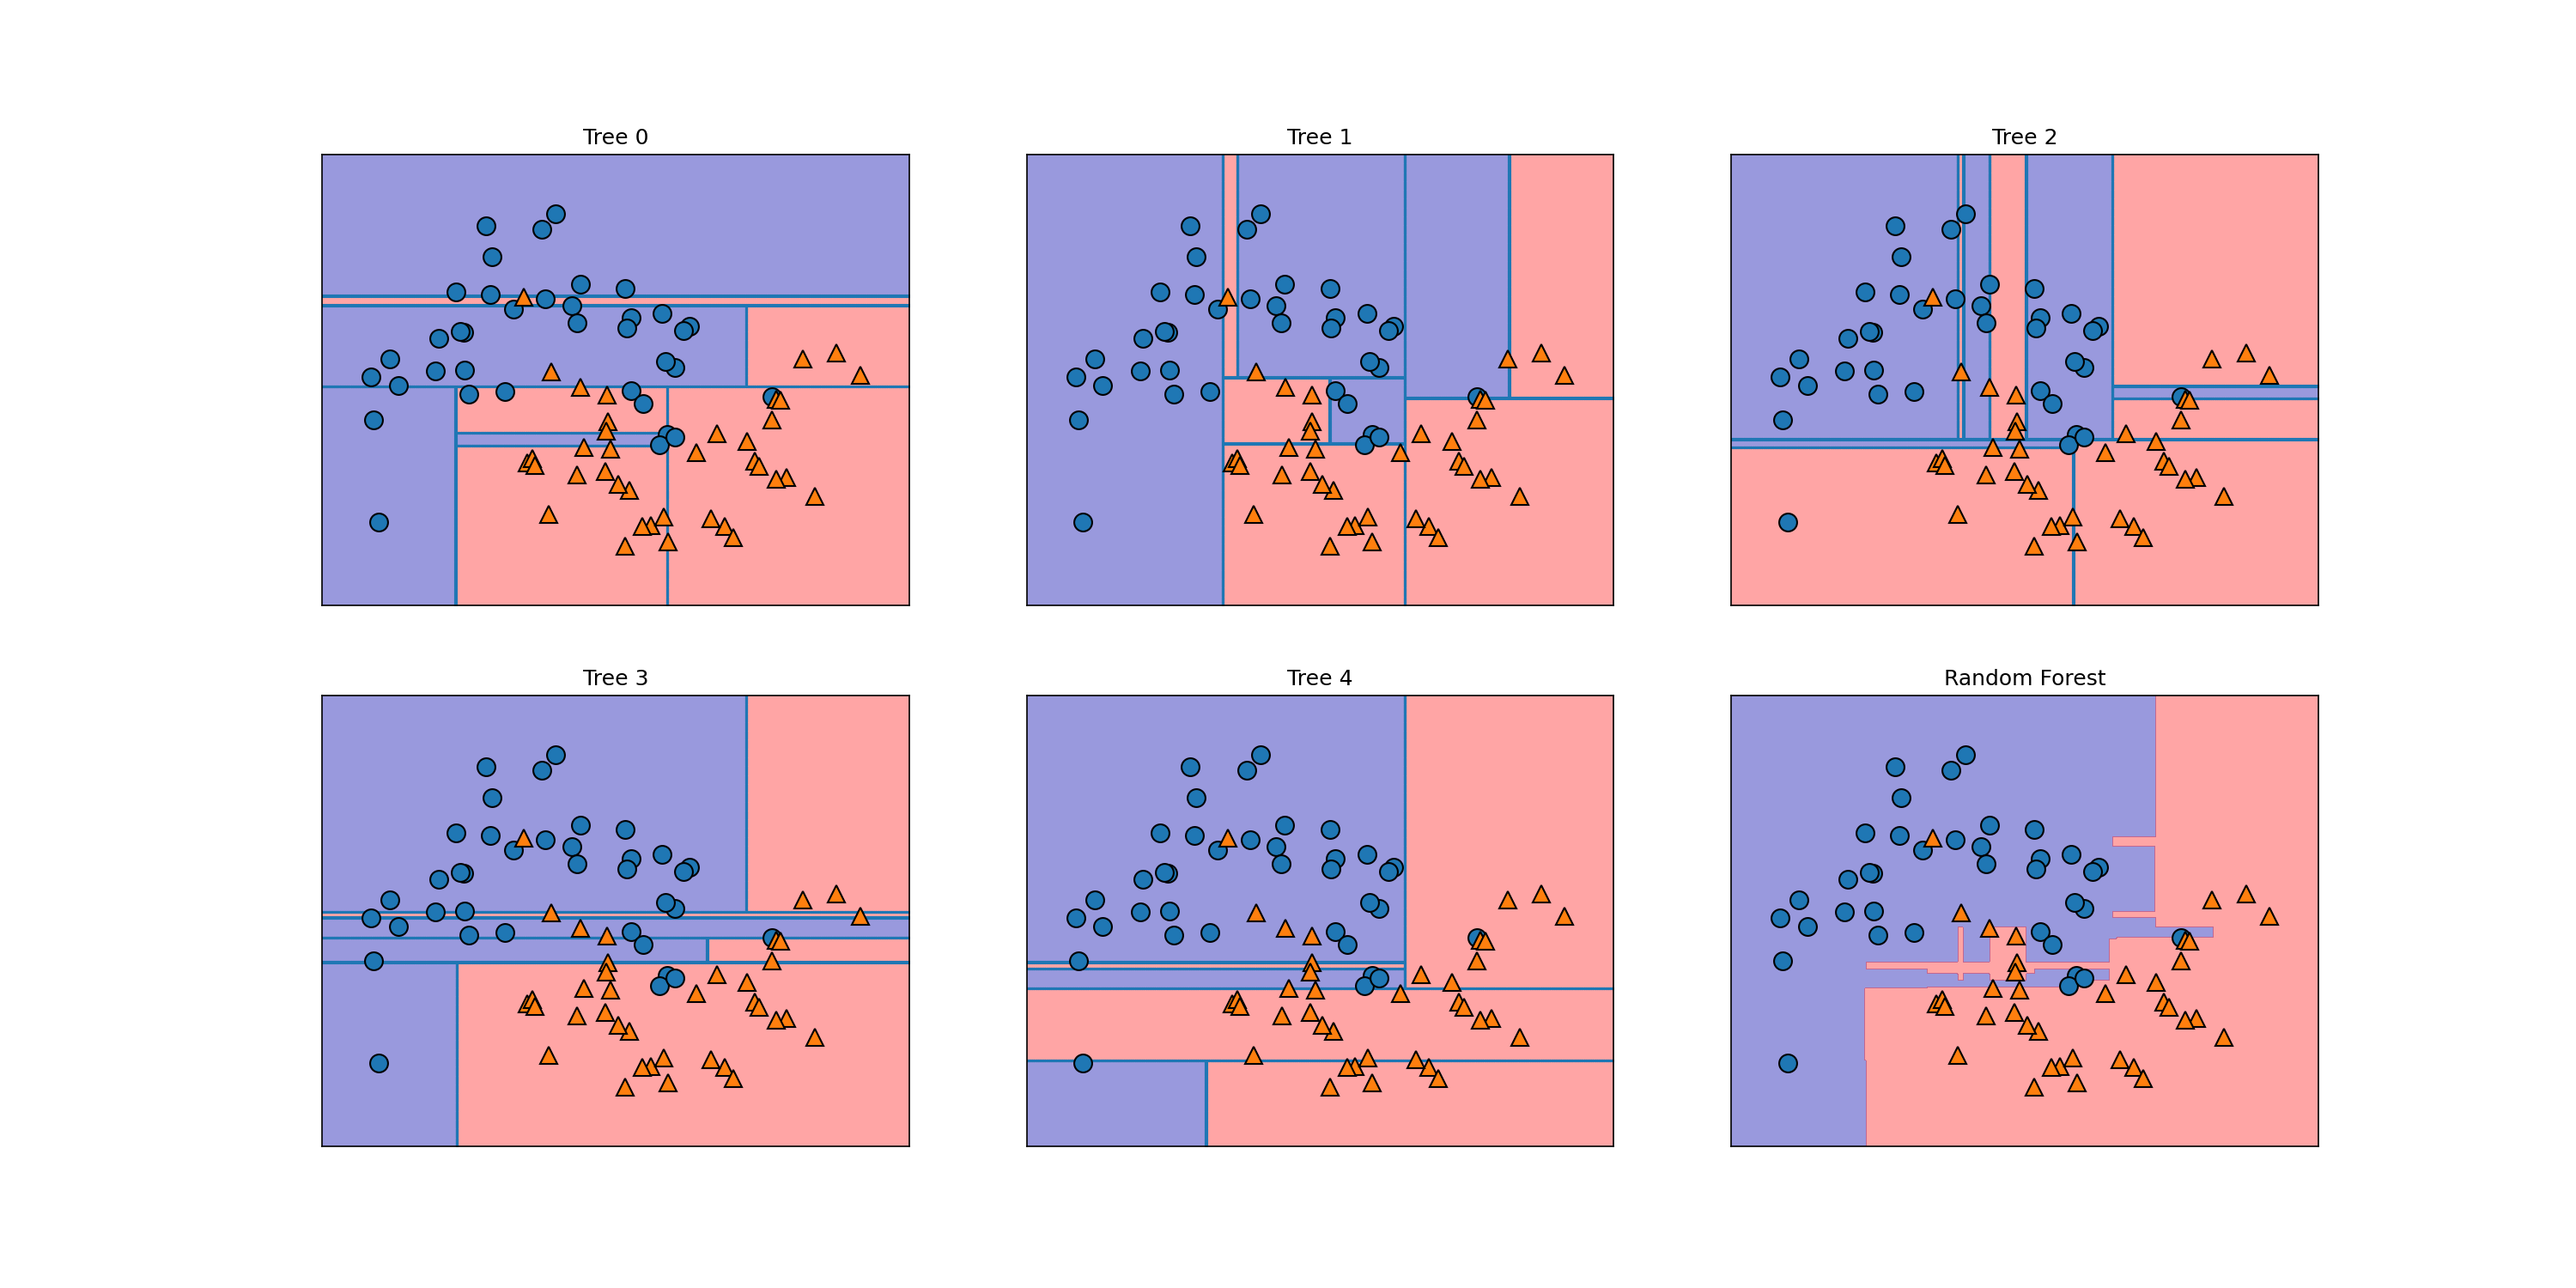

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

5つの決定木が学習した決定境界は明らかに相互に異なることがわかる。それぞれの決定木は、一
部の点について分類に失敗している。
平均することで滑らかになっている。

In [13]:
print(axes.ravel(),",", forest.estimators_)

[<AxesSubplot:title={'center':'Tree 0'}>
 <AxesSubplot:title={'center':'Tree 1'}>
 <AxesSubplot:title={'center':'Tree 2'}>
 <AxesSubplot:title={'center':'Tree 3'}>
 <AxesSubplot:title={'center':'Tree 4'}>
 <AxesSubplot:title={'center':'Random Forest'}>] , [DecisionTreeClassifier(max_features='auto', random_state=209652396), DecisionTreeClassifier(max_features='auto', random_state=398764591), DecisionTreeClassifier(max_features='auto', random_state=924231285), DecisionTreeClassifier(max_features='auto', random_state=1478610112), DecisionTreeClassifier(max_features='auto', random_state=441365315), DecisionTreeClassifier(max_features='auto', random_state=1537364731), DecisionTreeClassifier(max_features='auto', random_state=192771779), DecisionTreeClassifier(max_features='auto', random_state=1491434855), DecisionTreeClassifier(max_features='auto', random_state=1819583497), DecisionTreeClassifier(max_features='auto', random_state=530702035), DecisionTreeClassifier(max_features='auto', rando

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


0.972!?

In [18]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(forest)

?

GradientBoostingClassifierをcancerデータセットに適用した例を見てみる。  
デフォルトでは深さ3の決定木が100個作られ、学習率は0.1となる。

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


訓練セットに対する精度が1なので、おそらく過剰適合している。  
過剰適合を低減するためには、深さの最大値を制限してより強力な事前枝刈りを行うか、学習率を下げればよい。

In [23]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


深さ1まじか

In [24]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


最大深さを制限した方が、モデル性能が大きく向上している

In [25]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

？